In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_path = 'datasets/'

In [2]:
from metrics import metrics, calculate_metrics_table
from models import BaseModel, MonteCarlo, HistoricalSimulation, DeepARModel
from model_evaluation import EvaluateModel

/Users/liquich/miniforge3/envs/mlenv/lib/python3.11/site-packages/gluonts/json.py:101: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(


In [20]:
def load_data(file_path):
    return pd.read_csv(file_path, index_col='Date', parse_dates=True)

stocks = load_data(data_path + 'stocks.csv')
commodities = load_data(data_path + 'commodities.csv')
crypto = load_data(data_path + 'cryptos.csv')

In [21]:
window_size = 300
alpha = 95
train_size = 0.8
data = stocks

In [22]:
split_index = int(len(data) * train_size)
train_data = data.iloc[:split_index]
test_data = data.iloc[split_index - window_size:]

In [23]:
num_assets = test_data.shape[1]
np.random.seed(42)
weights = np.random.rand(num_assets)
weights /= np.sum(weights)
np.savetxt('weights_stocks95.csv', weights, delimiter=',')

In [24]:
weights = np.loadtxt('weights_stocks95.csv', delimiter=',')

# Example usage

Evaluating HistoricalSimulation (HS) model:


  0%|          | 0/1157 [00:00<?, ?it/s]

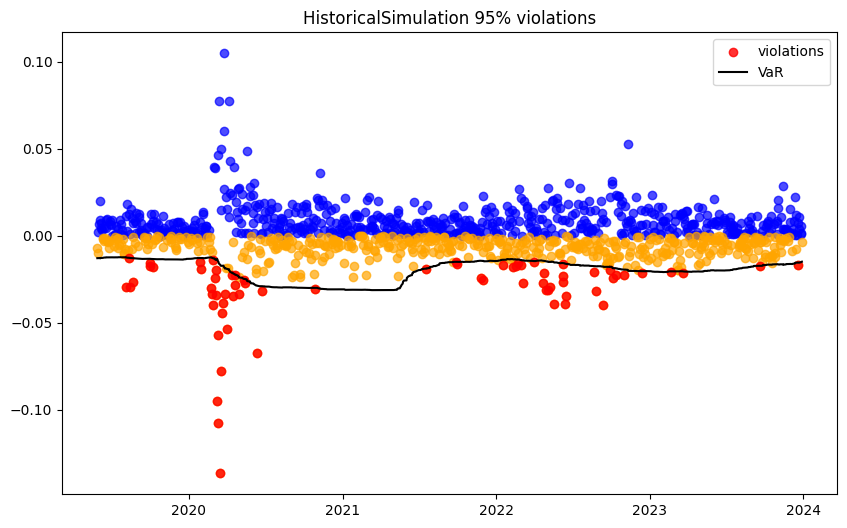

                           Value
POF Test p-value        0.000000
Berkowitz Test p-value  1.000000
Quantile Loss           0.001066
Quadratic Loss          0.018680
Smooth Loss             0.013533
Tick Loss               0.020652
Average Exceedances     0.060501
Regulatory Loss         0.000040


In [25]:
hs_model = HistoricalSimulation(alpha=alpha, window_size=window_size)
hs_model.fit(train_data)
hs_evaluator = EvaluateModel(hs_model, test_data, weights, alpha=alpha, window_size=window_size)
print("Evaluating HistoricalSimulation (HS) model:")
hs_evaluator.evaluate_model()
hs_evaluator.generate_metrics_table().to_csv(f"{hs_evaluator.model.name}_metrics.csv", index=True)

Evaluating MonteCarlo (MC) model:


  0%|          | 0/1157 [00:00<?, ?it/s]

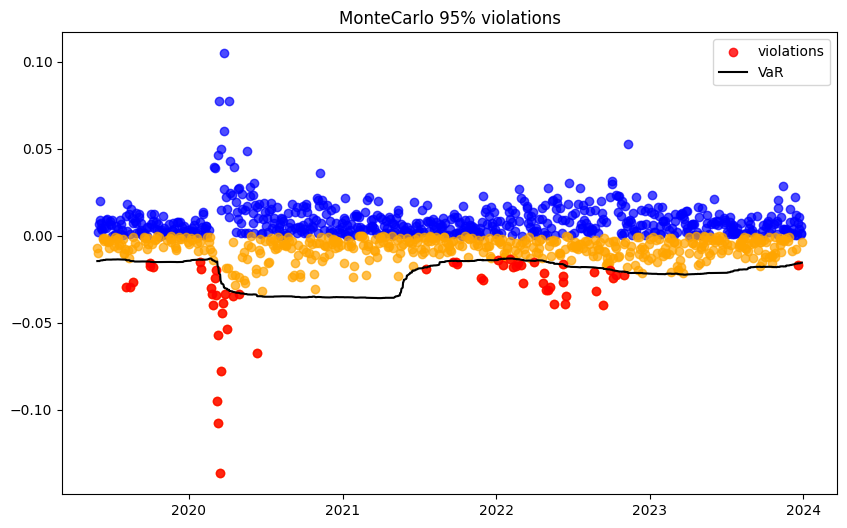

                           Value
POF Test p-value        0.000000
Berkowitz Test p-value  1.000000
Quantile Loss           0.000970
Quadratic Loss          0.020812
Smooth Loss             0.015149
Tick Loss               0.022550
Average Exceedances     0.051858
Regulatory Loss         0.000034


In [26]:
mc_model = MonteCarlo(alpha=alpha, window_size=window_size)
mc_model.fit(train_data)
mc_evaluator = EvaluateModel(mc_model, test_data, weights, alpha=alpha, window_size=window_size)
print("Evaluating MonteCarlo (MC) model:")
mc_evaluator.evaluate_model()
mc_evaluator.generate_metrics_table().to_csv(f"{mc_evaluator.model.name}_metrics.csv", index=True)

In [ ]:
deepar_model = DeepARModel(alpha=alpha, window_size=250)
deepar_model.fit(train_data)
deepar_evaluator = EvaluateModel(deepar_model, test_data, weights, alpha=alpha, window_size=250)
print("Evaluating DeepARModel (DeepVaR):")
deepar_evaluator.evaluate_model()
deepar_evaluator.generate_metrics_table().to_csv(f"{deepar_evaluator.model.name}_metrics.csv", index=True)

100%|██████████| 50/50 [00:03<00:00, 13.57it/s, epoch=5/5, avg_epoch_loss=-2.73]

Evaluating DeepARModel (DeepVaR):


  0%|          | 0/1207 [00:00<?, ?it/s]